In [2]:
import pandas as pd
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import numpy as np

%matplotlib inline
# figure size in inches optional
rcParams['figure.figsize'] = 8, 8

# Evaluation of Model 1

The following experiments are conducted on a trained model called Model 1. The model is the result of applying the implementation by Shahreza et al.

The model was trained on an FFHQ image set found on Kaggle: https://www.kaggle.com/datasets/arnaud58/flickrfaceshq-dataset-ffhq
The description of the dataset states that the set includes 52,000 files, in fact it consists of 52,001 files. The original FFHQ dataset consists of 70,000 files (https://github.com/NVlabs/ffhq-dataset), but we were unable to download the files from the official source.

The original samples were of 512x512 px resolution. The samples were cropped and aligned to a certain eye position by applyingmethods from Shahreza et al. implementation in order to have a matching eye position over all of the training files.

The embeddings used for training the model were generated from the processed samples using ArcFace iResNet100.

For training, a random selection of 90% of the dataset was used. The remaining 10% were used for testing.

The training ran for around 17 hours on a nVidia GTX 3090 graphics card to produce 100 model generations.

The aim of the training was to generate a model which can, for a given embedding, reconstruct the sample image from the latent space. The performance of the model is measured using the cosine simarity between embeddings of an original sample and a reconstructed sample.

In [2]:
df = pd.read_csv("../recreate_icip2022_face_reconstruction/logs/sample_images_log_reconstructed.csv", sep=",")
df_pemiu = pd.read_csv("../recreate_icip2022_face_reconstruction/logs/sample_images_log_pemiu.csv", sep=",")
df.head()

filename       MAE  Cosine Distance
0           Abel_Pacheco_0001  0.224421            0.614
1         Akhmed_Zakayev_0001  0.215487            0.452
2         Akhmed_Zakayev_0002  0.219688            0.462
3          Amber_Tamblyn_0001  0.205283            0.437
4  Anders_Fogh_Rasmussen_0001  0.257613            0.441

In [3]:
df_pemiu.head()

filename       MAE  Cosine Distance
0    Aaron_Eckhart_0001  0.252627           -0.053
1      Aaron_Guiel_0001  0.246376           -0.059
2  Aaron_Patterson_0001  0.175527            0.142
3    Aaron_Peirsol_0001  0.271703           -0.036
4    Aaron_Peirsol_0002  0.218717           -0.016

In [4]:
df.insert(3, "Cosine Distance PEMIU", df_pemiu['Cosine Distance'])
df.head()

filename       MAE  Cosine Distance  \
0           Abel_Pacheco_0001  0.224421            0.614   
1         Akhmed_Zakayev_0001  0.215487            0.452   
2         Akhmed_Zakayev_0002  0.219688            0.462   
3          Amber_Tamblyn_0001  0.205283            0.437   
4  Anders_Fogh_Rasmussen_0001  0.257613            0.441   

   Cosine Distance PEMIU  
0                 -0.053  
1                 -0.059  
2                  0.142  
3                 -0.036  
4                 -0.016

In [5]:
# Sort dataframe to have the most similar images on top
df = df.sort_values(by=['Cosine Distance'], ascending=False)

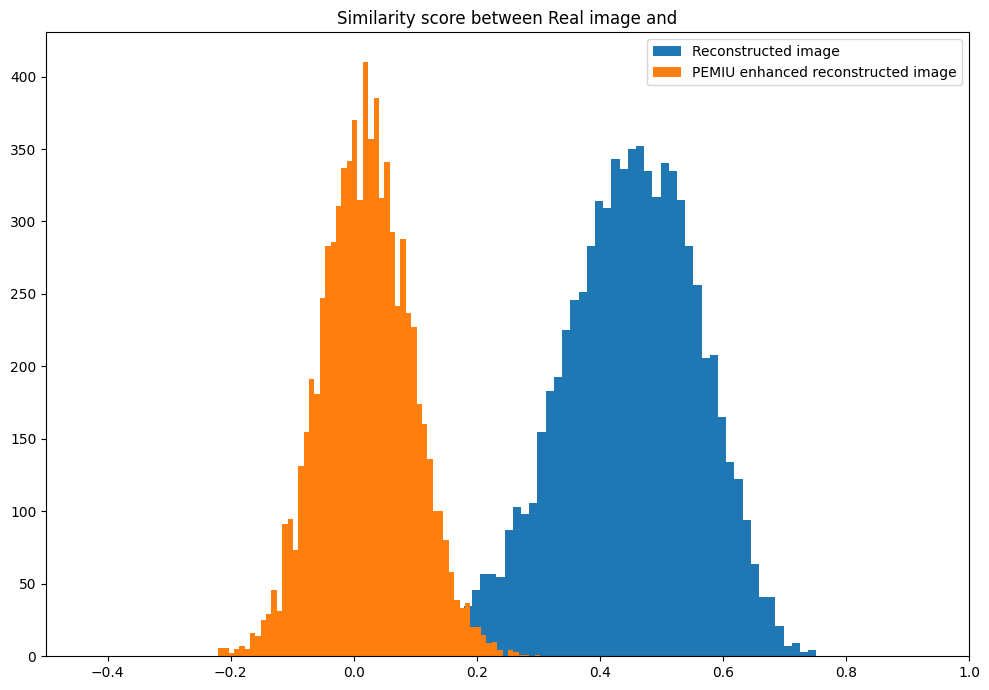

In [6]:
# Creating histogram
fig, ax = plt.subplots(1, 1,
                        figsize = (10, 7),
                        tight_layout = True)
ax.hist(df['Cosine Distance'], bins = 60, label="Reconstructed image")
ax.hist(df['Cosine Distance PEMIU'], bins = 60, label="PEMIU enhanced reconstructed image")
ax.legend()
ax.set_title("Similarity score between Real image and")
plt.xlim([-0.5, 1])
    
# Show plot
plt.show()

In [7]:
def get_images(filename, fileext):
    return [f"../recreate_icip2022_face_reconstruction/sample_images/{filename}_original.{fileext}",
            f"../recreate_icip2022_face_reconstruction/sample_images/{filename}_reconstructed.{fileext}",
            f"../recreate_icip2022_face_reconstruction/sample_images/{filename}_pemiu.{fileext}"]

def display_image(data, display_title):
    # read images
    img = []
    img.append(mpimg.imread(get_images(data[0], "png")[0]))
    img.append(mpimg.imread(get_images(data[0], "png")[1]))
    img.append(mpimg.imread(get_images(data[0], "png")[2]))
    # img.append(mpimg.imread(get_images(data[0], "png")[1]))

    # display images
    fig, ax = plt.subplots(1,3)
    
    if display_title:
        ax[0].set_title("Real", pad=16)
        ax[1].set_title("Reconstructed", pad=16)
        ax[2].set_title("Pemiu", pad=16)
        # ax[3].set_title("Pemiu Reconstr.", pad=16)
    
    # Display cosine similarity score
    ax[0].text(20, -6, "cos_dist vs. real", fontsize=8)
    ax[1].text(42, -6, data[1], fontsize=8)
    ax[2].text(42, -6, data[2], fontsize=8)
     
    for x in range(0, 3):
        ax[x].axis('off')
        ax[x].imshow(img[x])

### Experiment: Visual assessment of reconstructed images from unprotected and protected embeddings using model 1

For this experiment, 3,000 samples from the LFW dataset were used. The samples were cropped and aligned to match the eye position of the samples used for training the model. As embeddings, we used unprotected embeddings generated by the same facial recognition system as the training images, ArcFace IResNet 100.

A second set of embeddings was created by applying the PEMIU transformation on the generated embeddings.

The following plot displays real samples, reconstructed samples from unprotected embeddings, and reconstructed samples from protected embeddings using PEMIU. The results are sorted by cosine similarity between real sample and the unprotected reconsutrction, with the most similar being at the top. 

The cosine similarity shown for the PEMIU protected samples is computed between the real sample embeddings and the PEMIU protected embeddings. 

The cosine similarity scale was not normalized for this output. The values were produced during generation of the sample images and compare the real samples against the respective reconsutrcted samples.

While the unprotected samples generally have a high cosine similarity, a stark difference can be observed compared to the PEMIU enhanced samples. Also visually, the unprotected samples have a higher similarity to the original sample than the protected samples.

Since the results were sorted by the highest similarity score, random samples from the whole 3,000 items long list are shown to provide an understanding of how better and worse reconstructions look like.

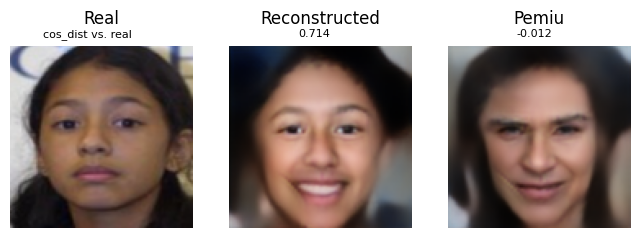

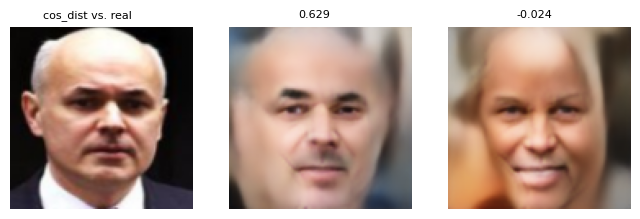

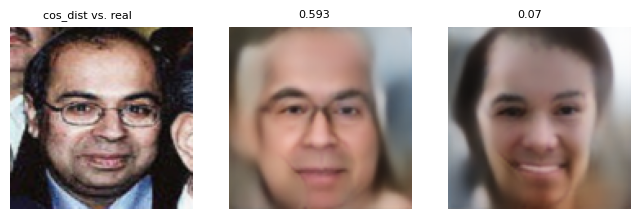

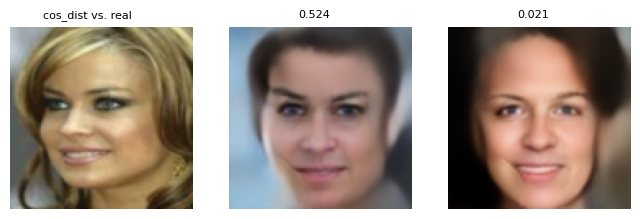

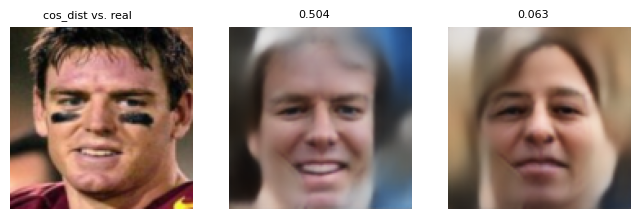

In [8]:
first_img = True
for i in [13, 300, 688, 2000, 2501]:
    display_image(df[['filename', 'Cosine Distance', 'Cosine Distance PEMIU']].values[i], first_img)
    first_img = False

In [9]:
df_comparisons = pd.read_csv("../data/lfw_view2/pairs_filenames.csv", sep=",")

In [10]:
target_a = [df_comparisons['a_embedding'].values[i][len("../data/features_cleaner/"):-4] for i in range(0,6000)]
target_b = [df_comparisons['b_embedding'].values[i][len("../data/features_cleaner/"):-4] for i in range(0,6000)]

In [11]:
df_comparisons.head()

a_img  \
0  ../data/lfw_align/Abel_Pacheco/Abel_Pacheco_00...   
1  ../data/lfw_align/Akhmed_Zakayev/Akhmed_Zakaye...   
2  ../data/lfw_align/Akhmed_Zakayev/Akhmed_Zakaye...   
3  ../data/lfw_align/Amber_Tamblyn/Amber_Tamblyn_...   
4  ../data/lfw_align/Anders_Fogh_Rasmussen/Anders...   

                                         a_embedding  \
0     ../data/features_cleaner/Abel_Pacheco_0001.npy   
1   ../data/features_cleaner/Akhmed_Zakayev_0001.npy   
2   ../data/features_cleaner/Akhmed_Zakayev_0002.npy   
3    ../data/features_cleaner/Amber_Tamblyn_0001.npy   
4  ../data/features_cleaner/Anders_Fogh_Rasmussen...   

                                               b_img  \
0  ../data/lfw_align/Abel_Pacheco/Abel_Pacheco_00...   
1  ../data/lfw_align/Akhmed_Zakayev/Akhmed_Zakaye...   
2  ../data/lfw_align/Akhmed_Zakayev/Akhmed_Zakaye...   
3  ../data/lfw_align/Amber_Tamblyn/Amber_Tamblyn_...   
4  ../data/lfw_align/Anders_Fogh_Rasmussen/Anders...   

                                         b_embedding  genuine  
0     ../data/features_cleaner/Abel_Pacheco_0004.npy     True  
1   ../data/features_cleaner/Akhmed_Zakayev_0003.npy     True  
2   ../data/features_cleaner/Akhmed_Zakayev_0003.npy     True  
3    ../data/features_cleaner/Amber_Tamblyn_0002.npy     True  
4  ../data/features_cleaner/Anders_Fogh_Rasmussen...     True

In [12]:
df_comparisons = df_comparisons.drop(['a_img'], axis=1)
df_comparisons = df_comparisons.drop(['b_img'], axis=1)
df_comparisons = df_comparisons.drop(['a_embedding'], axis=1)
df_comparisons = df_comparisons.drop(['b_embedding'], axis=1)

In [13]:
df_comparisons['a_target'] = target_a
df_comparisons['b_target'] = target_b
df_comparisons

genuine                                  a_target  \
0        True                         Abel_Pacheco_0001   
1        True                       Akhmed_Zakayev_0001   
2        True                       Akhmed_Zakayev_0002   
3        True                        Amber_Tamblyn_0001   
4        True                Anders_Fogh_Rasmussen_0001   
...       ...                                       ...   
5995    False                           Scott_Wolf_0002   
5996    False  Sergei_Alexandrovitch_Ordzhonikidze_0001   
5997    False                           Shane_Loux_0001   
5998    False                         Shawn_Marion_0001   
5999    False                   Slobodan_Milosevic_0002   

                        b_target  
0              Abel_Pacheco_0004  
1            Akhmed_Zakayev_0003  
2            Akhmed_Zakayev_0003  
3             Amber_Tamblyn_0002  
4     Anders_Fogh_Rasmussen_0003  
...                          ...  
5995          Troy_Polamalu_0001  
5996           Yolanda_King_0001  
5997           Val_Ackerman_0001  
5998          Shirley_Jones_0001  
5999                 Sok_An_0001  

[6000 rows x 3 columns]

In [14]:
df_comp_genuine = df_comparisons.loc[df_comparisons['genuine'] == True]
df_comp_impostor = df_comparisons.loc[df_comparisons['genuine'] == False]
df_comp_genuine.reset_index(drop=True, inplace=True)
df_comp_impostor.reset_index(drop=True, inplace=True)

df_eval = pd.read_csv("../evaluation/cos_sim_pemiu_reconstructed_lfwview2.csv", sep=",")

df_comp_genuine.insert(3, "cos_sim", df_eval['cos_sim_pemiu_reconstructed_genuine_normalized'])
df_comp_impostor.insert(3, "cos_sim", df_eval['cos_sim_pemiu_reconstructed_impostor_normalized'])

df_comp_genuine

genuine                     a_target                     b_target  \
0        True            Abel_Pacheco_0001            Abel_Pacheco_0004   
1        True          Akhmed_Zakayev_0001          Akhmed_Zakayev_0003   
2        True          Akhmed_Zakayev_0002          Akhmed_Zakayev_0003   
3        True           Amber_Tamblyn_0001           Amber_Tamblyn_0002   
4        True   Anders_Fogh_Rasmussen_0001   Anders_Fogh_Rasmussen_0003   
...       ...                          ...                          ...   
2995     True      Vladimir_Voltchkov_0001      Vladimir_Voltchkov_0002   
2996     True                 Wang_Yi_0001                 Wang_Yi_0002   
2997     True  Zafarullah_Khan_Jamali_0001  Zafarullah_Khan_Jamali_0002   
2998     True              Zhu_Rongji_0001              Zhu_Rongji_0003   
2999     True              Zhu_Rongji_0002              Zhu_Rongji_0008   

       cos_sim  
0     0.189173  
1     0.916049  
2     0.208491  
3     0.793789  
4     0.086260  
...        ...  
2995  0.694443  
2996  0.885014  
2997  0.127007  
2998  0.074035  
2999  0.827911  

[3000 rows x 4 columns]

In [15]:
df_comp_impostor

genuine                                  a_target  \
0       False                   Abdel_Madi_Shabneh_0001   
1       False                   Abdel_Madi_Shabneh_0001   
2       False                   Abdel_Madi_Shabneh_0001   
3       False                         Abdul_Rahman_0001   
4       False                         Abel_Pacheco_0001   
...       ...                                       ...   
2995    False                           Scott_Wolf_0002   
2996    False  Sergei_Alexandrovitch_Ordzhonikidze_0001   
2997    False                           Shane_Loux_0001   
2998    False                         Shawn_Marion_0001   
2999    False                   Slobodan_Milosevic_0002   

                       b_target   cos_sim  
0              Dean_Barker_0001  0.150951  
1     Giancarlo_Fisichella_0001  0.114397  
2        Mikhail_Gorbachev_0001  0.551249  
3          Portia_de_Rossi_0001  0.555888  
4            Jong_Thae_Hwa_0002  0.540194  
...                         ...       ...  
2995         Troy_Polamalu_0001  0.528482  
2996          Yolanda_King_0001  0.531918  
2997          Val_Ackerman_0001  0.506426  
2998         Shirley_Jones_0001  0.535699  
2999                Sok_An_0001  0.535477  

[3000 rows x 4 columns]

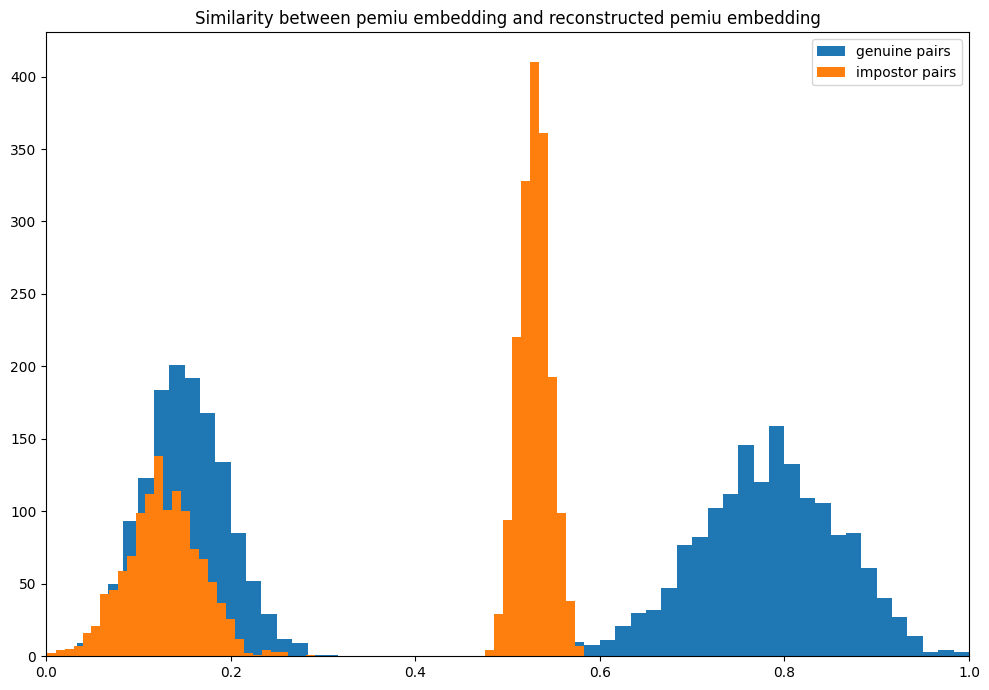

In [16]:
# Creating histogram
fig, ax = plt.subplots(1, 1,
                        figsize = (10, 7),
                        tight_layout = True)
ax.hist(df_comp_genuine['cos_sim'], bins = 60, label="genuine pairs")
ax.hist(df_comp_impostor['cos_sim'], bins = 60, label="impostor pairs")
ax.legend()
ax.set_title("Similarity between pemiu embedding and reconstructed pemiu embedding")
plt.xlim([0, 1])
    
# Show plot
plt.show()

In [17]:
def get_images(a_file, b_file, folder_name, index):
    return [f"../data/lfw_align/{a_file[:-5]}/{a_file}.png",
            f"../data/lfw_align/{b_file[:-5]}/{b_file}.png",
            f"../recreate_icip2022_face_reconstruction/sample_images/{a_file}_pemiu.png",
            f"../recreate_icip2022_face_reconstruction/sample_images_pemiu_{folder_name}_reconstructed/{index}/{a_file}_pemiu_reconstructed.png"]

def display_image(data, display_title, folder_name, index):
    # read images
    img = []
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[0]))
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[1]))
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[2]))
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[3]))

    # display images
    fig, ax = plt.subplots(1,4)
    
    if display_title:
        ax[0].set_title("a real", pad=16)
        ax[1].set_title("b real", pad=16)
        ax[2].set_title("a pemiu", pad=16)
        ax[3].set_title("a pemiu reconstr", pad=16)
    
    # Display cosine similarity score
    ax[0].text(0, -6, data[0], fontsize=8)
    ax[1].text(0, -6, data[1], fontsize=8)
    ax[2].text(42, -6, "", fontsize=8)
    ax[3].text(42, -6, round(data[2], 3), fontsize=8)
     
    for x in range(0, 4):
        ax[x].axis('off')
        ax[x].imshow(img[x])

### Overview of genuine comparison pairs

* Genuine comparisons
* LFW View 2 comparison genuine pairs
* a: Target A
* b: Target B
* Target A and B are samples from the same subject
* A PEMIU is a sythesized image from the privacy enhanced embedding using PEMIU
* A PEMIU Reconstructed is a synthesized image from a reconstructed privacy enhanced PEMIU embedding, using the PEMIU reconstruct method

PEMIU reconstruction uses two samples from the same subject to reconstruct the shuffled/privacy enhanced embedding. The two samples are the genuine comparison samples that are also listed as target a and b for each row.

The experiment aims at comparing the visual fidelity and ability to identify soft biometric features, such as gender, of the different image synthetisations.

On some of the samples, the biometric viability seems to be high enough, judiging by the cosine similarity, which is displayed above the image. The source of this calculation should be double checked, since the way we calculated and normalized this is different to other experiments.

We can see that using PEMIU, the gender is not clearly visually identifyable anymore, not in the PEMIU enhanced version, and also not in the reconstructed version.

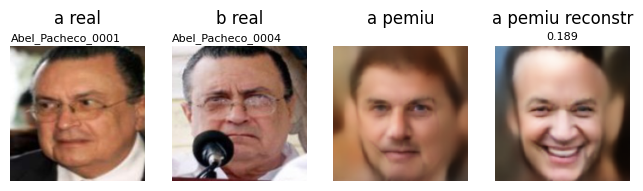

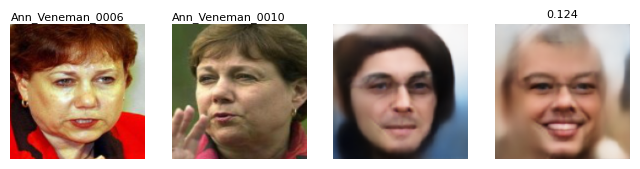

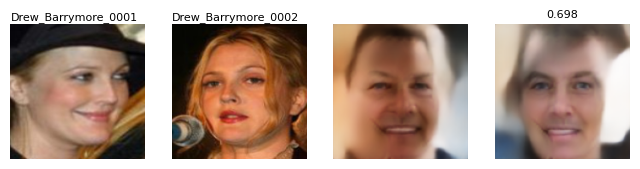

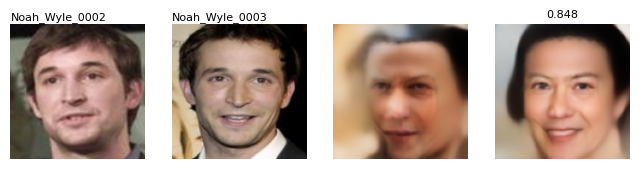

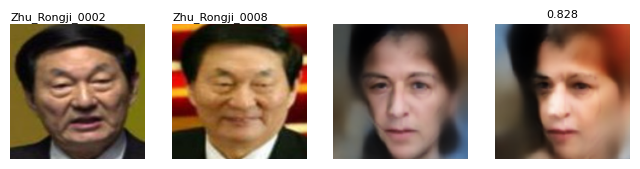

In [18]:
first_image = True
for i in [0, 10, 50, 200, 2999]:
    display_image(df_comp_genuine[['a_target', 'b_target', 'cos_sim']].values[i], first_image, "genuine", str(i).zfill(4))
    first_image = False

### Overview of impostor comparison pairs

- LFW View 2 Impostor comparisons

The PEMIU reconstruction in this example uses the impostor samples. This means that the PEMIU reconstructions are created using zero-effort impostors. Therefore, the biometric viability should be lower. This can be verified by comparing the cosine similarity, which is generally lower than compared to the genuine comparison pairs.

Again, we can observe a stark difference between target a and the corresponding PEMIU differences.

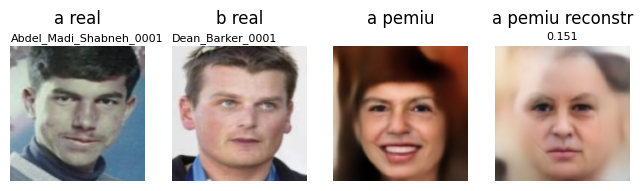

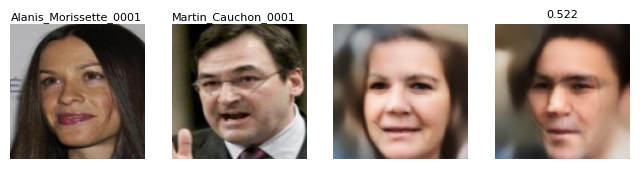

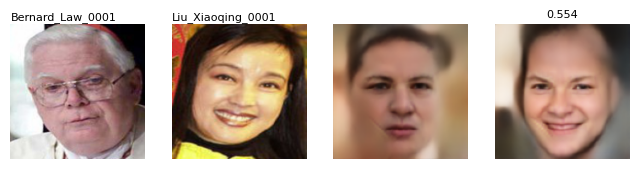

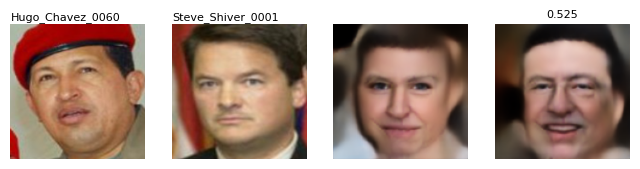

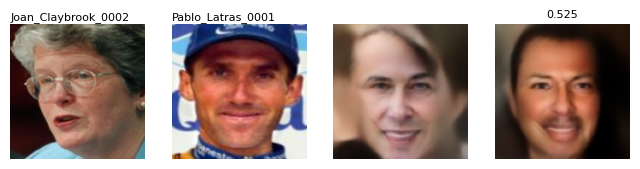

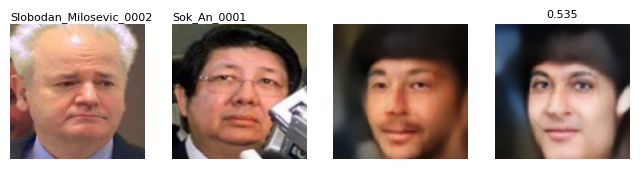

In [19]:
first_image = True
for i in [0, 10, 50, 200, 2000, 2999]:
    display_image(df_comp_impostor[['a_target', 'b_target', 'cos_sim']].values[i], first_image, "impostor", str(i).zfill(4))
    first_image = False

In [20]:
def get_images(a_file, b_file, folder_name, index):
    return [f"../data/lfw_align/{a_file[:-5]}/{a_file}.png",
            f"../recreate_icip2022_face_reconstruction/sample_images/{a_file}_reconstructed.png",
            f"../recreate_icip2022_face_reconstruction/sample_images/{a_file}_pemiu.png"]

def display_image(data, display_title, folder_name, index):
    # read images
    img = []
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[0]))
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[1]))
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[2]))

    # display images
    fig, ax = plt.subplots(1,3)
    
    if display_title:
        ax[0].set_title("Real", pad=16)
        ax[1].set_title("Unprotected\nreconstruction", pad=16)
        ax[2].set_title("Privacy enhanced\nrecontruction", pad=16)
    
    # Display cosine similarity score
    ax[0].text(0, -6, "", fontsize=8)
    ax[1].text(0, -6, "", fontsize=8)
    ax[2].text(42, -6, "", fontsize=8)
     
    for x in range(len(ax)):
        ax[x].axis('off')
        ax[x].imshow(img[x])

### Visual comparison of unmodified, privacy enhanced (PEMU) and privacy enhanced reconstructed (PEMIU) synthesized images

- Compare the soft-biometric feature reduction between the unmodified and privacy enhanced versions of the synthesized images
- Each row displays synthesized images for one target.
- The privacy enhanced embeddings, which are the source for the synthesized images, are corresponding to the sample shown on the left.

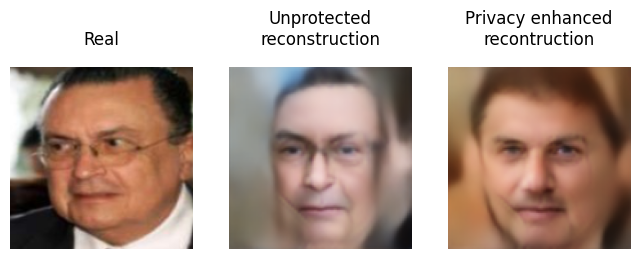

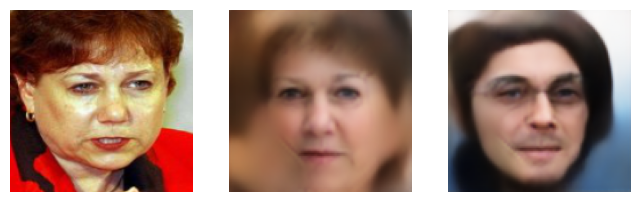

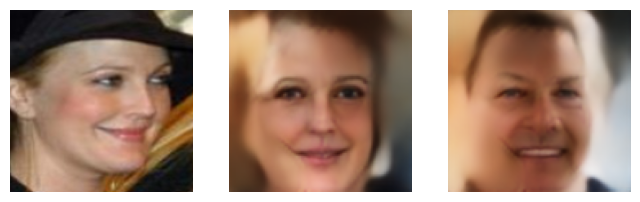

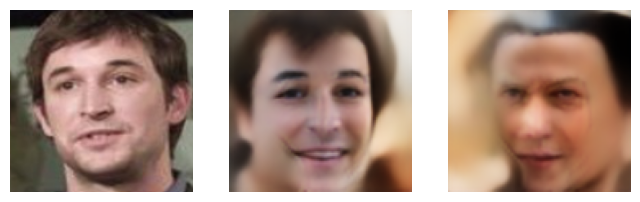

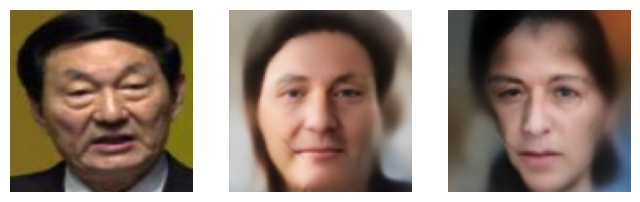

In [21]:
first_image = True
for i in [0, 10, 50, 200, 2999]:
    display_image(df_comp_genuine[['a_target', 'b_target', 'cos_sim']].values[i], first_image, "genuine", str(i).zfill(4))
    first_image = False

In [22]:
df_pairs_gender = pd.read_csv("../evaluation/lfw_complete_genders.csv", sep=",")
df_pairs_gender

Unnamed: 0                                          lfw_image  \
0               0  ../data/lfw_align/Aaron_Eckhart/Aaron_Eckhart_...   
1               1  ../data/lfw_align/Aaron_Guiel/Aaron_Guiel_0001...   
2               2  ../data/lfw_align/Aaron_Patterson/Aaron_Patter...   
3               3  ../data/lfw_align/Aaron_Peirsol/Aaron_Peirsol_...   
4               4  ../data/lfw_align/Aaron_Peirsol/Aaron_Peirsol_...   
...           ...                                                ...   
13228       13228  ../data/lfw_align/Zorica_Radovic/Zorica_Radovi...   
13229       13229  ../data/lfw_align/Zulfiqar_Ahmed/Zulfiqar_Ahme...   
13230       13230  ../data/lfw_align/Zumrati_Juma/Zumrati_Juma_00...   
13231       13231  ../data/lfw_align/Zurab_Tsereteli/Zurab_Tseret...   
13232       13232  ../data/lfw_align/Zydrunas_Ilgauskas/Zydrunas_...   

                                           lfw_embedding  \
0        ../data/features_cleaner/Aaron_Eckhart_0001.npy   
1          ../data/features_cleaner/Aaron_Guiel_0001.npy   
2      ../data/features_cleaner/Aaron_Patterson_0001.npy   
3        ../data/features_cleaner/Aaron_Peirsol_0001.npy   
4        ../data/features_cleaner/Aaron_Peirsol_0002.npy   
...                                                  ...   
13228   ../data/features_cleaner/Zorica_Radovic_0001.npy   
13229   ../data/features_cleaner/Zulfiqar_Ahmed_0001.npy   
13230     ../data/features_cleaner/Zumrati_Juma_0001.npy   
13231  ../data/features_cleaner/Zurab_Tsereteli_0001.npy   
13232  ../data/features_cleaner/Zydrunas_Ilgauskas_00...   

                                         lfw_image_pemiu  \
0      ./sample_images_lfw_pemiu/Aaron_Eckhart_0001_p...   
1      ./sample_images_lfw_pemiu/Aaron_Guiel_0001_pem...   
2      ./sample_images_lfw_pemiu/Aaron_Patterson_0001...   
3      ./sample_images_lfw_pemiu/Aaron_Peirsol_0001_p...   
4      ./sample_images_lfw_pemiu/Aaron_Peirsol_0002_p...   
...                                                  ...   
13228  ./sample_images_lfw_pemiu/Zorica_Radovic_0001_...   
13229  ./sample_images_lfw_pemiu/Zulfiqar_Ahmed_0001_...   
13230  ./sample_images_lfw_pemiu/Zumrati_Juma_0001_pe...   
13231  ./sample_images_lfw_pemiu/Zurab_Tsereteli_0001...   
13232  ./sample_images_lfw_pemiu/Zydrunas_Ilgauskas_0...   

                                     lfw_embedding_pemiu  \
0      ../data/features_cleaner_pemiu/Aaron_Eckhart_0...   
1      ../data/features_cleaner_pemiu/Aaron_Guiel_000...   
2      ../data/features_cleaner_pemiu/Aaron_Patterson...   
3      ../data/features_cleaner_pemiu/Aaron_Peirsol_0...   
4      ../data/features_cleaner_pemiu/Aaron_Peirsol_0...   
...                                                  ...   
13228  ../data/features_cleaner_pemiu/Zorica_Radovic_...   
13229  ../data/features_cleaner_pemiu/Zulfiqar_Ahmed_...   
13230  ../data/features_cleaner_pemiu/Zumrati_Juma_00...   
13231  ../data/features_cleaner_pemiu/Zurab_Tsereteli...   
13232  ../data/features_cleaner_pemiu/Zydrunas_Ilgaus...   

                  lfw_filename_raw gender_official gender_insightface  \
0           Aaron_Eckhart_0001.png               M                  M   
1             Aaron_Guiel_0001.png               M                  M   
2         Aaron_Patterson_0001.png               M                  M   
3           Aaron_Peirsol_0001.png               M                  M   
4           Aaron_Peirsol_0002.png               M                  M   
...                            ...             ...                ...   
13228      Zorica_Radovic_0001.png               F                  F   
13229      Zulfiqar_Ahmed_0001.png               M                  M   
13230        Zumrati_Juma_0001.png               F                  M   
13231     Zurab_Tsereteli_0001.png               M                  M   
13232  Zydrunas_Ilgauskas_0001.png               M                  M   

      gender_insightface_pemiu  
0                            F  
1                            F  
2  

In [23]:
# Four samples are missing in the official gender list downloaded from the LFW website.
# They are assigned as 'x' and are omitted in the following evaluation
df_pairs_gender.loc[df_pairs_gender['gender_official'] == "X"]

Unnamed: 0                                          lfw_image  \
10832       10832  ../data/lfw_align/Robert_Evans/Robert_Evans_00...   
10833       10833  ../data/lfw_align/Robert_Evans/Robert_Evans_00...   
11968       11968     ../data/lfw_align/Tara_Kirk/Tara_Kirk_0001.png   
13117       13117  ../data/lfw_align/Yasser_Arafat/Yasser_Arafat_...   

                                         lfw_embedding  \
10832   ../data/features_cleaner/Robert_Evans_0001.npy   
10833   ../data/features_cleaner/Robert_Evans_0002.npy   
11968      ../data/features_cleaner/Tara_Kirk_0001.npy   
13117  ../data/features_cleaner/Yasser_Arafat_0005.npy   

                                         lfw_image_pemiu  \
10832  ./sample_images_lfw_pemiu/Robert_Evans_0001_pe...   
10833  ./sample_images_lfw_pemiu/Robert_Evans_0002_pe...   
11968  ./sample_images_lfw_pemiu/Tara_Kirk_0001_pemiu...   
13117  ./sample_images_lfw_pemiu/Yasser_Arafat_0005_p...   

                                     lfw_embedding_pemiu  \
10832  ../data/features_cleaner_pemiu/Robert_Evans_00...   
10833  ../data/features_cleaner_pemiu/Robert_Evans_00...   
11968  ../data/features_cleaner_pemiu/Tara_Kirk_0001.npy   
13117  ../data/features_cleaner_pemiu/Yasser_Arafat_0...   

             lfw_filename_raw gender_official gender_insightface  \
10832   Robert_Evans_0001.png               X                  M   
10833   Robert_Evans_0002.png               X                  F   
11968      Tara_Kirk_0001.png               X                  F   
13117  Yasser_Arafat_0005.png               X                  M   

      gender_insightface_pemiu  
10832                        M  
10833                        F  
11968                        F  
13117                        F

### Algorithmic analysis of the soft-attribute suppression for the example of gender with privacy enhancement on image level

- Using InsightFace gender attribute detection
- First confusion matrix displays the gender of unmodified LFW samples. 
- The algorithmically attributed gender is compared to the official gender accessible on the LFW website

Insight face false prediction rate of gender is 3.66 %

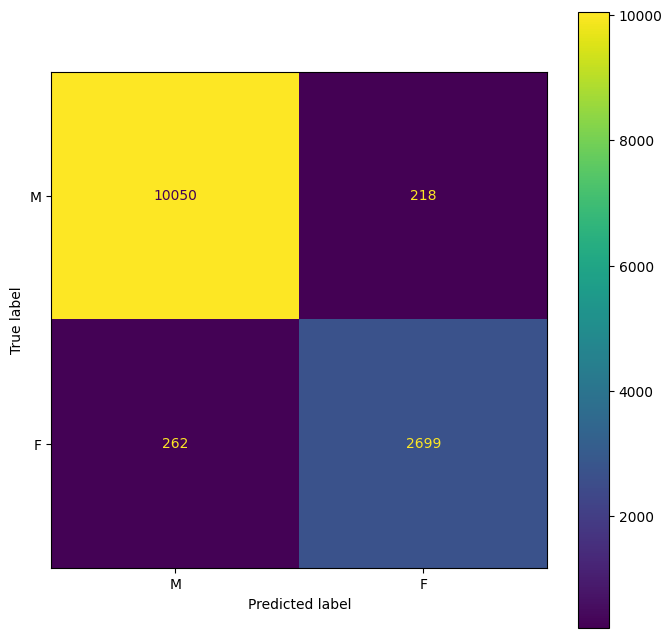

Insight face false prediction rate: 3.66 %


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(df_pairs_gender['gender_official'], df_pairs_gender['gender_insightface'], labels=["M", "F"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["M", "F"])
disp.plot(values_format = '')
plt.show()

false_prediction_unmodified = []
for index, element in enumerate(df_pairs_gender['gender_official']):
    if element != df_pairs_gender['gender_insightface'][index]:
        false_prediction_unmodified.append(element)
        
print(f"Insight face false prediction rate: {round((len(false_prediction_unmodified) / len(df_pairs_gender) * 100), 2)} %")

We now create a confision matrix contrasting the correct gender from the LFW website with the attributed gender of sythesized images from privacy enhanced embeddings using PEMIU.

InsightFace now falsely predicts the gender by 59.71 %

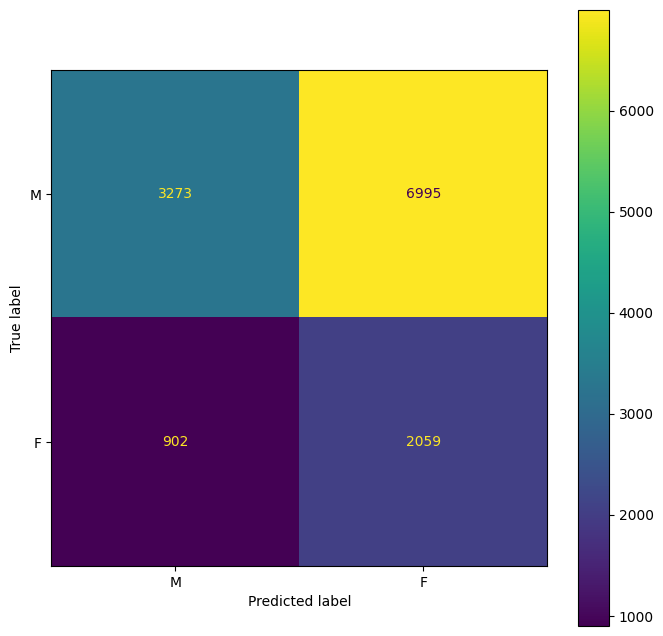

False prediction rate between LFW genuine gender and pemiu embedding image reconstruction: 59.71 %


In [25]:
cm = confusion_matrix(df_pairs_gender['gender_official'], df_pairs_gender['gender_insightface_pemiu'], labels=["M", "F"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["M", "F"])
disp.plot(values_format = '')
plt.show()

false_prediction_pemiu = []
for index, element in enumerate(df_pairs_gender['gender_official']):
    if element != df_pairs_gender['gender_insightface_pemiu'][index]:
        false_prediction_pemiu.append(element)
        
print(f"False prediction rate between LFW genuine gender and pemiu embedding image reconstruction: {round((len(false_prediction_pemiu) / len(df_pairs_gender) * 100), 2)} %")

### Algorithmic gender attribution of unmodified LFW samples and synthesized privacy enhanced samples using InsightFace

- Pie charts comparing the percentage results of correctly and incorrectly classified genders

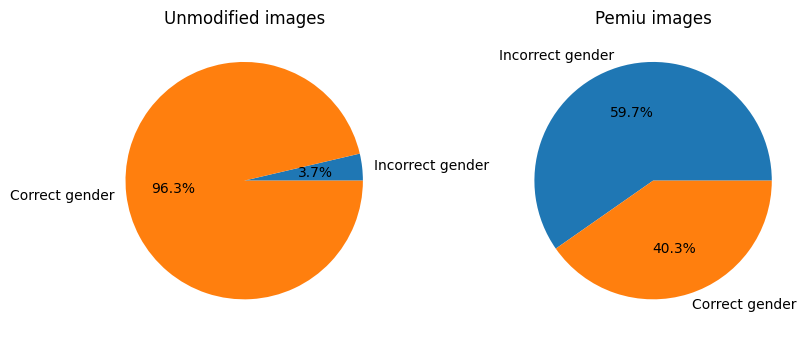

In [26]:
# create data: an array of values
size_of_groups_unmodified=[len(false_prediction_unmodified),(len(df_pairs_gender) - len(false_prediction_unmodified))]
size_of_groups_pemiu=[len(false_prediction_pemiu),(len(df_pairs_gender) - len(false_prediction_pemiu))]

# Create a pieplot
fig, ax = plt.subplots(1,2, constrained_layout = True)
# fig.tight_layout(pad=2.0)
ax[0].set_title("Unmodified images")
ax[1].set_title("Pemiu images")
ax[0].pie(size_of_groups_unmodified, labels=["Incorrect gender", "Correct gender"], autopct='%1.1f%%')
ax[1].pie(size_of_groups_pemiu, labels=["Incorrect gender", "Correct gender"], autopct='%1.1f%%')
# plt.title("Automatic gender attribution with InsightFace")
plt.show()

In [3]:
# Plot normalized cosine similarity for LFW view 2 genuine and impostor pairs

df_genuine = pd.read_csv("../evaluation/lfwview2_genuine_cos_sim.csv", sep=",")
df_impostor = pd.read_csv("../evaluation/lfwview2_impostor_cos_sim.csv", sep=",")

df_genuine

Unnamed: 0                                              a_img  \
0              0  ../data/lfw_align/Abel_Pacheco/Abel_Pacheco_00...   
1              1  ../data/lfw_align/Akhmed_Zakayev/Akhmed_Zakaye...   
2              2  ../data/lfw_align/Akhmed_Zakayev/Akhmed_Zakaye...   
3              3  ../data/lfw_align/Amber_Tamblyn/Amber_Tamblyn_...   
4              4  ../data/lfw_align/Anders_Fogh_Rasmussen/Anders...   
...          ...                                                ...   
2995        5695  ../data/lfw_align/Vladimir_Voltchkov/Vladimir_...   
2996        5696         ../data/lfw_align/Wang_Yi/Wang_Yi_0001.png   
2997        5697  ../data/lfw_align/Zafarullah_Khan_Jamali/Zafar...   
2998        5698   ../data/lfw_align/Zhu_Rongji/Zhu_Rongji_0001.png   
2999        5699   ../data/lfw_align/Zhu_Rongji/Zhu_Rongji_0002.png   

                                            a_embedding  \
0        ../data/features_cleaner/Abel_Pacheco_0001.npy   
1      ../data/features_cleaner/Akhmed_Zakayev_0001.npy   
2      ../data/features_cleaner/Akhmed_Zakayev_0002.npy   
3       ../data/features_cleaner/Amber_Tamblyn_0001.npy   
4     ../data/features_cleaner/Anders_Fogh_Rasmussen...   
...                                                 ...   
2995  ../data/features_cleaner/Vladimir_Voltchkov_00...   
2996          ../data/features_cleaner/Wang_Yi_0001.npy   
2997  ../data/features_cleaner/Zafarullah_Khan_Jamal...   
2998       ../data/features_cleaner/Zhu_Rongji_0001.npy   
2999       ../data/features_cleaner/Zhu_Rongji_0002.npy   

                                                  b_img  \
0     ../data/lfw_align/Abel_Pacheco/Abel_Pacheco_00...   
1     ../data/lfw_align/Akhmed_Zakayev/Akhmed_Zakaye...   
2     ../data/lfw_align/Akhmed_Zakayev/Akhmed_Zakaye...   
3     ../data/lfw_align/Amber_Tamblyn/Amber_Tamblyn_...   
4     ../data/lfw_align/Anders_Fogh_Rasmussen/Anders...   
...                                                 ...   
2995  ../data/lfw_align/Vladimir_Voltchkov/Vladimir_...   
2996         ../data/lfw_align/Wang_Yi/Wang_Yi_0002.png   
2997  ../data/lfw_align/Zafarullah_Khan_Jamali/Zafar...   
2998   ../data/lfw_align/Zhu_Rongji/Zhu_Rongji_0003.png   
2999   ../data/lfw_align/Zhu_Rongji/Zhu_Rongji_0008.png   

                                            b_embedding  genuine  \
0        ../data/features_cleaner/Abel_Pacheco_0004.npy     True   
1      ../data/features_cleaner/Akhmed_Zakayev_0003.npy     True   
2      ../data/features_cleaner/Akhmed_Zakayev_0003.npy     True   
3       ../data/features_cleaner/Amber_Tamblyn_0002.npy     True   
4     ../data/features_cleaner/Anders_Fogh_Rasmussen...     True   
...                                                 ...      ...   
2995  ../data/features_cleaner/Vladimir_Voltchkov_00...     True   
2996          ../data/features_cleaner/Wang_Yi_0002.npy     True   
2997  ../data/features_cleaner/Zafarullah_Khan_Jamal...     True   
2998       ../data/features_cleaner/Zhu_Rongji_0003.npy     True   
2999       ../data/features_cleaner/Zhu_Rongji_0008.npy     True   

                                    a_img_reconstructed  \
0     sample_images/Abel_Pacheco_0001_reconstructed.png   
1     sample_images/Akhmed_Zakayev_0001_reconstructe...   
2     sample_images/Akhmed_Zakayev_0002_reconstructe...   
3     sample_images/Amber_Tamblyn_0001_reconstructed...   
4     sample_images/Anders_Fogh_Rasmussen_0001_recon...   
...                                                 ...   
2995  sample_images/Vladimir_Voltchkov_0001_reconstr...   
2996       sample_images/Wang_Yi_0001_reconstructed.png   
2997  sample_images/Zafarullah_Khan_Jamali_0001_reco...   
2998    sample_images/Zhu_Rongji_0001_reconstructed.png   
2999    sample_images/Zhu_Rongji_0002_reconstructed.png   

                              a_embedding_reconstructed  \
0     sample_images_embeddings/Abel_Pacheco_0001_rec...   
1     sample_images_embeddings/Akhmed_Zakayev_0001_r...   
2     sample_images_embeddings/A

In [4]:
df_impostor

Unnamed: 0                                              a_img  \
0            300  ../data/lfw_align/Abdel_Madi_Shabneh/Abdel_Mad...   
1            301  ../data/lfw_align/Abdel_Madi_Shabneh/Abdel_Mad...   
2            302  ../data/lfw_align/Abdel_Madi_Shabneh/Abdel_Mad...   
3            303  ../data/lfw_align/Abdul_Rahman/Abdul_Rahman_00...   
4            304  ../data/lfw_align/Abel_Pacheco/Abel_Pacheco_00...   
...          ...                                                ...   
2995        5995   ../data/lfw_align/Scott_Wolf/Scott_Wolf_0002.png   
2996        5996  ../data/lfw_align/Sergei_Alexandrovitch_Ordzho...   
2997        5997   ../data/lfw_align/Shane_Loux/Shane_Loux_0001.png   
2998        5998  ../data/lfw_align/Shawn_Marion/Shawn_Marion_00...   
2999        5999  ../data/lfw_align/Slobodan_Milosevic/Slobodan_...   

                                            a_embedding  \
0     ../data/features_cleaner/Abdel_Madi_Shabneh_00...   
1     ../data/features_cleaner/Abdel_Madi_Shabneh_00...   
2     ../data/features_cleaner/Abdel_Madi_Shabneh_00...   
3        ../data/features_cleaner/Abdul_Rahman_0001.npy   
4        ../data/features_cleaner/Abel_Pacheco_0001.npy   
...                                                 ...   
2995       ../data/features_cleaner/Scott_Wolf_0002.npy   
2996  ../data/features_cleaner/Sergei_Alexandrovitch...   
2997       ../data/features_cleaner/Shane_Loux_0001.npy   
2998     ../data/features_cleaner/Shawn_Marion_0001.npy   
2999  ../data/features_cleaner/Slobodan_Milosevic_00...   

                                                  b_img  \
0     ../data/lfw_align/Dean_Barker/Dean_Barker_0001...   
1     ../data/lfw_align/Giancarlo_Fisichella/Giancar...   
2     ../data/lfw_align/Mikhail_Gorbachev/Mikhail_Go...   
3     ../data/lfw_align/Portia_de_Rossi/Portia_de_Ro...   
4     ../data/lfw_align/Jong_Thae_Hwa/Jong_Thae_Hwa_...   
...                                                 ...   
2995  ../data/lfw_align/Troy_Polamalu/Troy_Polamalu_...   
2996  ../data/lfw_align/Yolanda_King/Yolanda_King_00...   
2997  ../data/lfw_align/Val_Ackerman/Val_Ackerman_00...   
2998  ../data/lfw_align/Shirley_Jones/Shirley_Jones_...   
2999           ../data/lfw_align/Sok_An/Sok_An_0001.png   

                                            b_embedding  genuine  \
0         ../data/features_cleaner/Dean_Barker_0001.npy    False   
1     ../data/features_cleaner/Giancarlo_Fisichella_...    False   
2     ../data/features_cleaner/Mikhail_Gorbachev_000...    False   
3     ../data/features_cleaner/Portia_de_Rossi_0001.npy    False   
4       ../data/features_cleaner/Jong_Thae_Hwa_0002.npy    False   
...                                                 ...      ...   
2995    ../data/features_cleaner/Troy_Polamalu_0001.npy    False   
2996     ../data/features_cleaner/Yolanda_King_0001.npy    False   
2997     ../data/features_cleaner/Val_Ackerman_0001.npy    False   
2998    ../data/features_cleaner/Shirley_Jones_0001.npy    False   
2999           ../data/features_cleaner/Sok_An_0001.npy    False   

                                    a_img_reconstructed  \
0     sample_images/Abdel_Madi_Shabneh_0001_reconstr...   
1     sample_images/Abdel_Madi_Shabneh_0001_reconstr...   
2     sample_images/Abdel_Madi_Shabneh_0001_reconstr...   
3     sample_images/Abdul_Rahman_0001_reconstructed.png   
4     sample_images/Abel_Pacheco_0001_reconstructed.png   
...                                                 ...   
2995    sample_images/Scott_Wolf_0002_reconstructed.png   
2996  sample_images/Sergei_Alexandrovitch_Ordzhoniki...   
2997    sample_images/Shane_Loux_0001_reconstructed.png   
2998  sample_images/Shawn_Marion_0001_reconstructed.png   
2999  sample_images/Slobodan_Milosevic_0002_reconstr...   

                              a_embedding_reconstructed  \
0     sample_images_embeddings/Abdel_Madi_Shabneh_00...   
1     sample_images_embeddings/Abdel_Madi_Shabneh_00...   
2     sample_images_embeddings/A

In [5]:
print('\n'.join(df_genuine.columns))

Unnamed: 0
a_img
a_embedding
b_img
b_embedding
genuine
a_img_reconstructed
a_embedding_reconstructed
b_img_reconstructed
b_embedding_reconstructed
a_img_pemiu
a_embedding_pemiu
b_img_pemiu
b_embedding_pemiu
a_embedding_pemiu_reconstructed
cos_sim_a_b
cos_sim_a_a_pemiu
cos_sim_a_b_pemiu
cos_sim_a_pemiu_b_pemiu
cos_sim_a_pemiu_a_pemiu_reconstructed
cos_sim_a_a_pemiu_reconstructed
cos_sim_a_a_reconstructed
cos_sim_a_b_reconstructed
cos_sim_scipy_a_b
cos_sim_scipy_a_a_pemiu
cos_sim_a_b_normalized
cos_sim_a_a_pemiu_normalized
cos_sim_a_b_pemiu_normalized
cos_sim_a_pemiu_b_pemiu_normalized
cos_sim_a_pemiu_a_pemiu_reconstructed_normalized
cos_sim_a_a_pemiu_reconstructed_normalized
cos_sim_a_a_reconstructed_normalized
cos_sim_a_b_reconstructed_normalized
cos_sim_scipy_a_b_normalized
cos_sim_scipy_a_a_pemiu_normalized


In [6]:
df_genuine['cos_sim_a_a_reconstructed']

0       0.707280
1       0.507694
2       0.534566
3       0.788124
4       0.484710
          ...   
2995    0.448427
2996    0.560406
2997    0.686318
2998    0.426125
2999    0.440475
Name: cos_sim_a_a_reconstructed, Length: 3000, dtype: float64

---

## Cosine similarity comparison of genuine/zero-effort impostors and privacy enhanced templates (PEMIU)

* Embedding level
* LFW View 2 genuine/impostor pairs
* Compare similarity of privacy enhanced template (PEMIU) to unmodified template (same subject, same sample)
* Comparison between the samples is DIFSE (different image, same feature extractor)

This experiment visualises the biometric viability of privacy enhanced embeddings using PEMIU, which have not been reconstructed using the PEMIU reconstruction method.

The cosine similarity of the privacy enhanced samples is as low as zero-effort impostors.

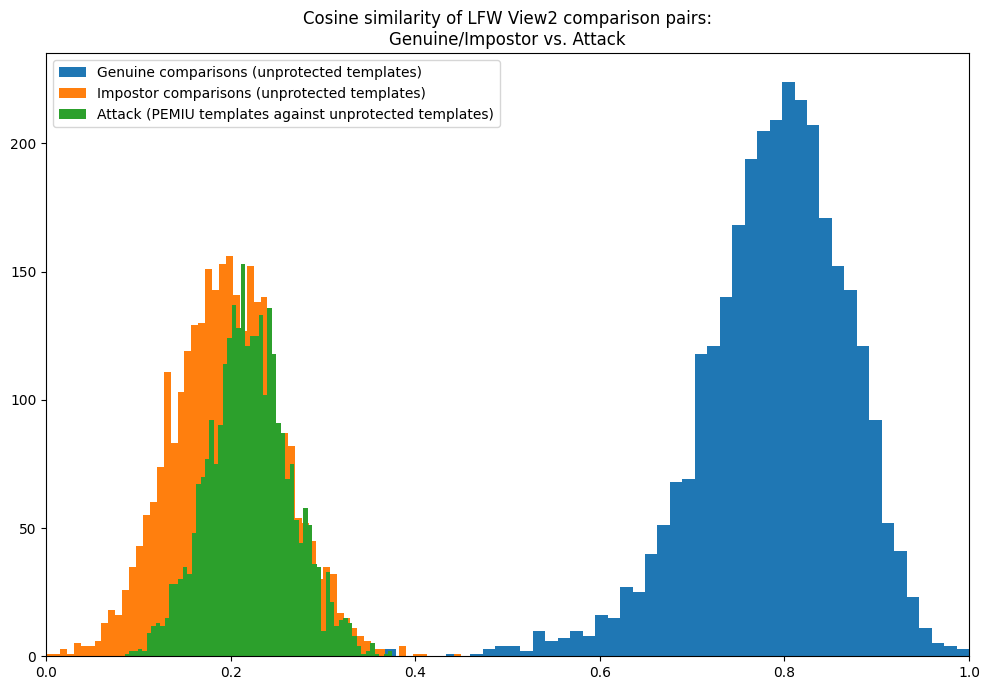

In [7]:
fig, ax = plt.subplots(1, 1,
                        figsize = (10, 7),
                        tight_layout = True)
# Comparison: Genuine and imnpostor
ax.hist(df_genuine['cos_sim_a_b_normalized'], bins = 60, label="Genuine comparisons (unprotected templates)")
ax.hist(df_impostor['cos_sim_a_b_normalized'], bins = 60, label="Impostor comparisons (unprotected templates)")

# Comparison: Genuine and pemiu
ax.hist(df_genuine['cos_sim_a_a_pemiu_normalized'], bins = 60, label="Attack (PEMIU templates against unprotected templates)")
# ax.hist(df_genuine['cos_sim_a_b_pemiu_normalized'], bins = 60, label="a genuine, b pemiu")
# ax.hist(df_genuine['cos_sim_a_pemiu_b_pemiu_normalized'], bins = 60, label="a pemiu, b pemiu")

ax.legend()
ax.set_title("Cosine similarity of LFW View2 comparison pairs:\nGenuine/Impostor vs. Attack")
plt.xlim([0, 1])
    
# Show plot
plt.show()

# Histogram displays normalized cosine similarity of embeddings using the LFW view2 comparison pairs:
#     - target_a and target_b genuine pair
#     - target_a and target_b impostor pair
#     - target_a genuine and target_b genuine pemiu enhanced

### Biometric viability on the metric of cosine similarity of privacy enhanced templates using PEMIU

- Genuine/Impostor comparisons are LFW View 2 comparison pairs

We can observe that unprotected genuine comparisons have a high cosine similarity between comparison pairs.

Around half of the genuine privacy enhanced reconstructed templates have a good cosine similarity, en par with the genuine comparison. However, the other half is en par with impostors.

For impostor reconstructions, using impostor pairs to reconstruct the PEMIU enhanced embeddings, also achieve a split result, where around half scores much lower than th other. However, even the higher scoring embeddings score below a certain threshold and could be idetified as impostors.

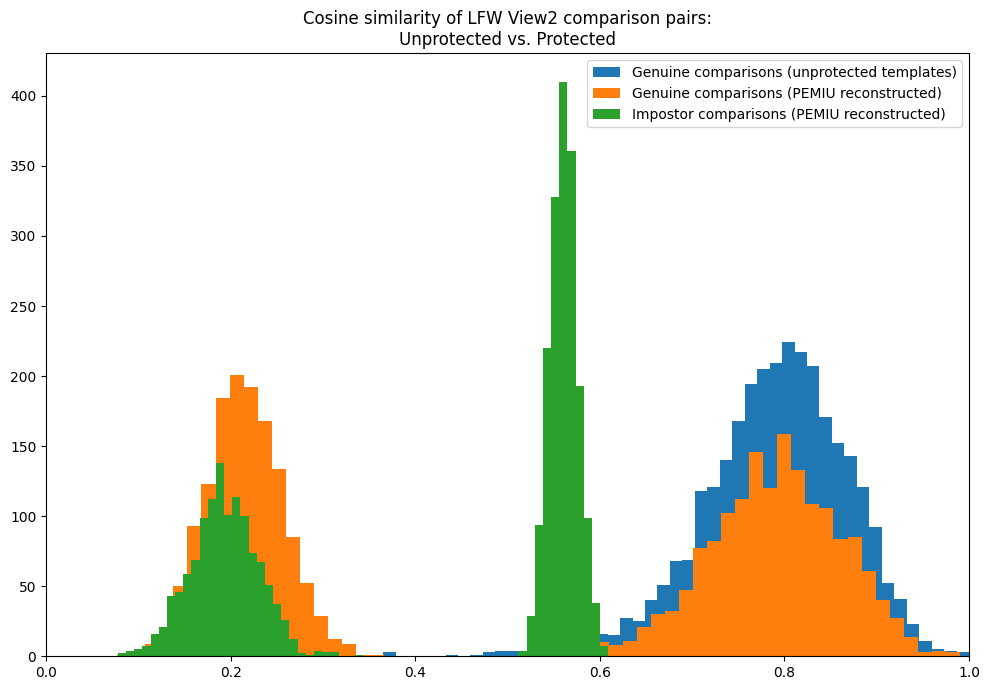

In [8]:
fig, ax = plt.subplots(1, 1,
                        figsize = (10, 7),
                        tight_layout = True)

# Comparison: Genuine and imnpostor
ax.hist(df_genuine['cos_sim_a_b_normalized'], bins = 60, label="Genuine comparisons (unprotected templates)")
# ax.hist(df_impostor['cos_sim_a_b_normalized'], bins = 60, label="unmodified impostor")

# Comparison: target a pemiu and target a pemiu reconstrcuted of genuine and impostor
ax.hist(df_genuine['cos_sim_a_pemiu_a_pemiu_reconstructed_normalized'], bins = 60, label="Genuine comparisons (PEMIU reconstructed)")
ax.hist(df_impostor['cos_sim_a_pemiu_a_pemiu_reconstructed_normalized'], bins = 60, label="Impostor comparisons (PEMIU reconstructed)")

ax.legend()
ax.set_title("Cosine similarity of LFW View2 comparison pairs:\nUnprotected vs. Protected")
plt.xlim([0, 1])
    
# Show plot
plt.show()

In [9]:
pemiu_reconstr_usable, pemiu_reconstr_unusable = [], []
for row in df_genuine['cos_sim_a_pemiu_a_pemiu_reconstructed_normalized']:
    if float(row) > 0.3:
        pemiu_reconstr_usable.append(row)
    else:
        pemiu_reconstr_unusable.append(row)
        
# Not all genuine reconstructed pemiu enhanced templates seem to be usable.
print(f"Number of genuine recreated pemiu templates over 0.3 cos_sim:\t\t{len(pemiu_reconstr_usable)}")
print(f"Number of genuine recreated pemiu templates under 0.3 cos_sim:\t\t{len(pemiu_reconstr_unusable)}")

Number of genuine recreated pemiu templates over 0.3 cos_sim:		1669
Number of genuine recreated pemiu templates under 0.3 cos_sim:		1331


### Comparison of two different methods of calculating cosine similarity

- Method one: Scipy distance package, used by Shareza et al.
- Method two: PEMIU cos_sim method, used by Terhörst et al. in the PEMIU implementation

The histograms for each calculation achieve around the same distribution, which can be seen by the overlap of the histograms.

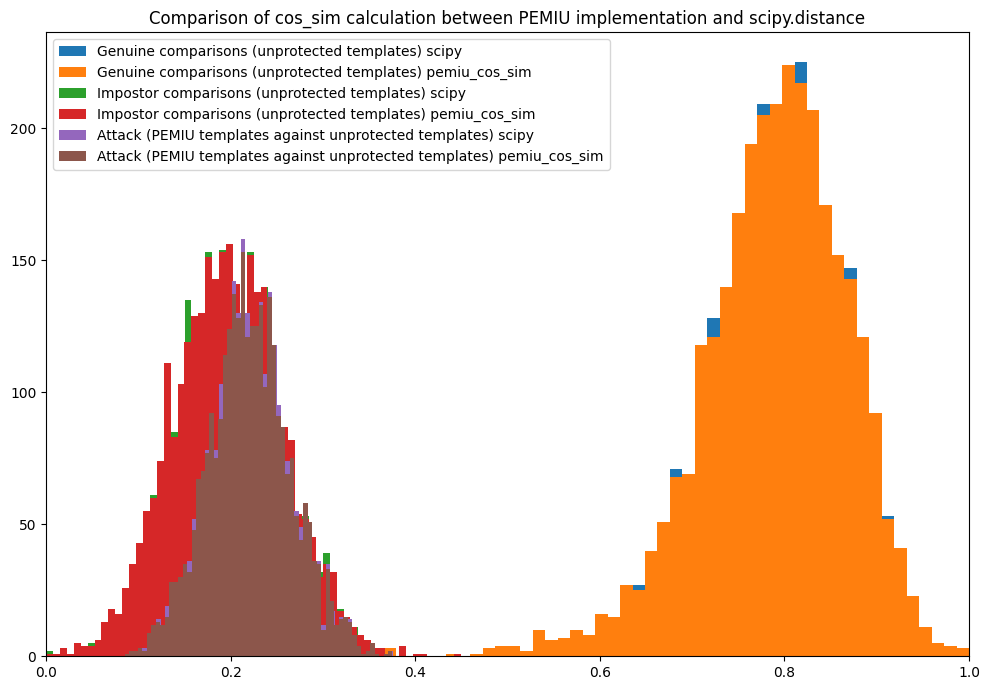

In [11]:
fig, ax = plt.subplots(1, 1,
                        figsize = (10, 7),
                        tight_layout = True)
# Comparison: Genuine and imnpostor
ax.hist(df_genuine['cos_sim_scipy_a_b_normalized'], bins = 60, label="Genuine comparisons (unprotected templates) scipy")
ax.hist(df_genuine['cos_sim_a_b_normalized'], bins = 60, label="Genuine comparisons (unprotected templates) pemiu_cos_sim")

ax.hist(df_impostor['cos_sim_scipy_a_b_normalized'], bins = 60, label="Impostor comparisons (unprotected templates) scipy")
ax.hist(df_impostor['cos_sim_a_b_normalized'], bins = 60, label="Impostor comparisons (unprotected templates) pemiu_cos_sim")

ax.hist(df_genuine['cos_sim_scipy_a_a_pemiu_normalized'], bins = 60, 
        label="Attack (PEMIU templates against unprotected templates) scipy")
ax.hist(df_genuine['cos_sim_a_a_pemiu_normalized'], bins = 60, 
        label="Attack (PEMIU templates against unprotected templates) pemiu_cos_sim")

ax.legend()
ax.set_title("Comparison of cos_sim calculation between PEMIU implementation and scipy.distance")
plt.xlim([0, 1])
    
# Show plot
plt.show()

# Compare different cosine similarity calculations:
#     - cos_sim using method in PEMIU implementation
#     - cos_sim using scipy.distance method from Hatef's implementation

### Cosine similarity of recreated images

- LFW View 2 comparison paris
- SISFE (Same image same feature extractor) is also called Type-I attack
- DIFSE (Differnet image same feature extractor) is also called Type-II attack
- Same image comparisons compare the same subject and the same sample, but one sample is the unmodified original, and the other one is a synthesized image from an unprotected embedding
- Different image cmparisons compare the sample with a different sample from the same subject

The Geuine, Impostor and SISFE inversion attack curves correspond with the results from Shareza et al.

We can generally see that the synthesized images from unprotectedtemplates achieve a high cosine similarity, which is always en par with the genuine comparisons.

We can see that comparing same subject different sample, the similarity lowers for the sythesized images.

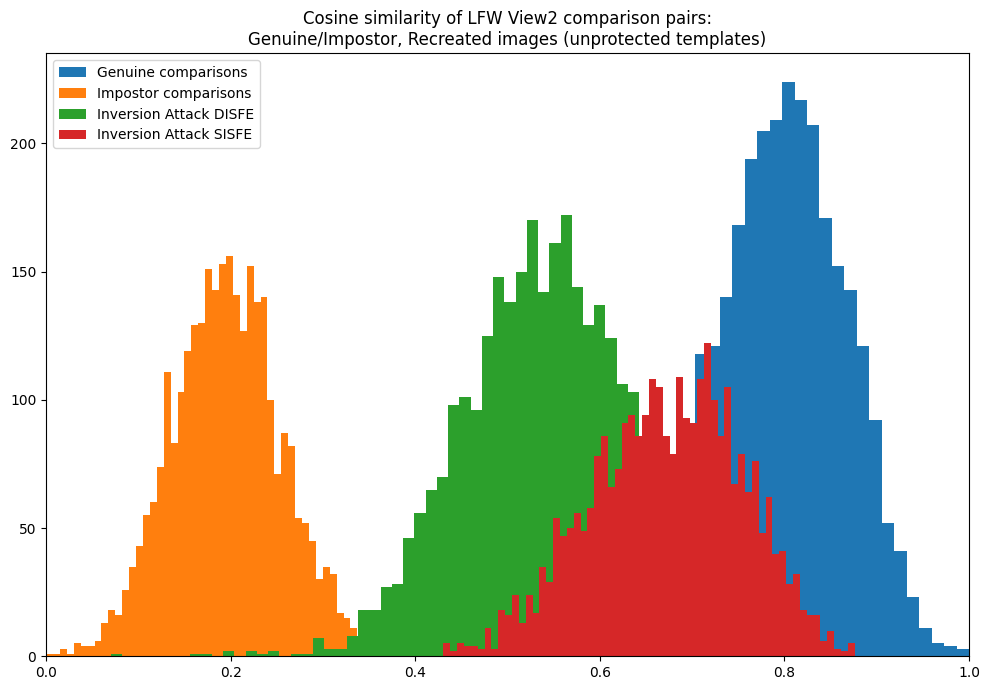

In [12]:
fig, ax = plt.subplots(1, 1,
                        figsize = (10, 7),
                        tight_layout = True)

# Comparison: Genuine and impostor
ax.hist(df_genuine['cos_sim_a_b_normalized'], bins = 60, label="Genuine comparisons")
ax.hist(df_impostor['cos_sim_a_b_normalized'], bins = 60, label="Impostor comparisons")

# Comparison: Inversion Attack DISFE
ax.hist(df_genuine['cos_sim_a_b_reconstructed_normalized'], bins = 60, label="Inversion Attack DISFE")

# Comparison: Inversion Attack SISFE
ax.hist(df_genuine['cos_sim_a_a_reconstructed_normalized'], bins = 60, label="Inversion Attack SISFE")

ax.legend()
ax.set_title("Cosine similarity of LFW View2 comparison pairs:\nGenuine/Impostor, Recreated images (unprotected templates)")
plt.xlim([0, 1])
    
# Show plot
plt.show()

# Histogram displays normalized cosine similarity of embeddings using the LFW view2 comparison pairs.
#     - a
#     - b
#     - c

---

### Model 1 training logs

Training data:
* FFHQ Dataset
* Unmodified embeddings

Run-time training around 17 hours. 100 epochs.

Chart shows learning rate.

In [36]:
df_train = pd.read_csv("../recreate_icip2022_face_reconstruction/training_files/logs_train/generator.csv", sep=",")
df_train

epoch  MSE_loss_Gen  ID_loss_Gen  ssim_loss_Gen_test  total_loss_Gen
0       1      0.055748     0.976272            0.315628        0.092192
1       2      0.054415     0.946409            0.311984        0.090345
2       3      0.054177     0.827667            0.309317        0.089247
3       4      0.055009     0.704808            0.308716        0.089405
4       5      0.056409     0.621916            0.309091        0.090428
..    ...           ...          ...                 ...             ...
95     96      0.068963     0.542106            0.325374        0.104211
96     97      0.068900     0.542527            0.325353        0.104148
97     98      0.068872     0.539515            0.325152        0.104085
98     99      0.068439     0.542545            0.325115        0.103664
99    100      0.069087     0.540826            0.325507        0.104342

[100 rows x 5 columns]

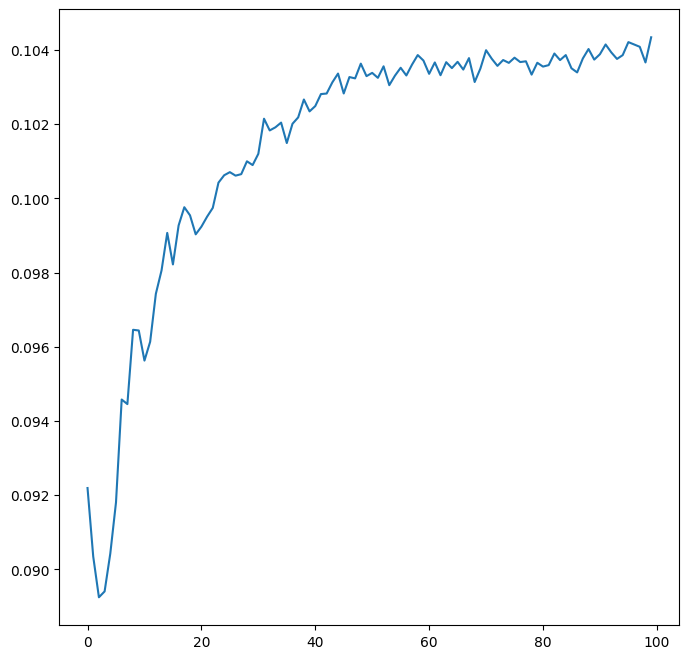

In [37]:
plt.plot(df_train['total_loss_Gen'])
plt.show()

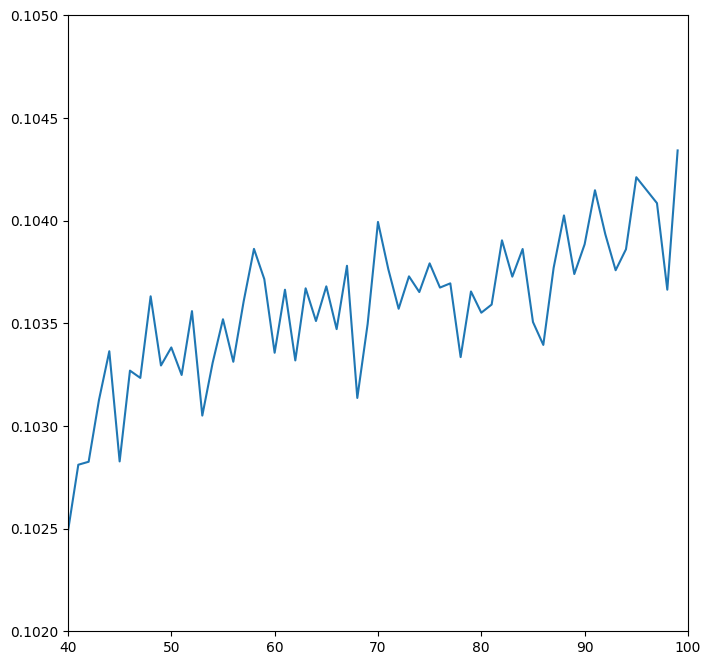

In [38]:
plt.plot(df_train['total_loss_Gen'])
plt.ylim([0.102, 0.105])
plt.xlim([40, 100])
plt.show()

In [39]:
df_train_log = pd.read_csv("../recreate_icip2022_face_reconstruction/training_files/logs_train/log.txt", sep=",", names=['epoch', 'iteration', 'total_loss'])
df_train_log['epoch'] = df_train_log['epoch'].apply(lambda x: x.split(':')[-1].strip())
df_train_log['iteration'] = df_train_log['iteration'].apply(lambda x: x.split(':')[-1].strip())
df_train_log['total_loss'] = df_train_log['total_loss'].apply(lambda x: x.split(':')[-1].strip())
df_train_log

epoch iteration            total_loss
0       1       200   0.10218580067157745
1       1       400   0.09218817204236984
2       1       600   0.10090702027082443
3       1       800   0.09500058740377426
4       1      1000   0.09218069911003113
..    ...       ...                   ...
695   100       600  0.026783213019371033
696   100       800  0.029935060068964958
697   100      1000  0.030031513422727585
698   100      1200  0.028620952740311623
699   100      1400   0.02837471477687359

[700 rows x 3 columns]

## Pyeer Report
* LFW Dataset
* View 2 protocol

Measuring biometric performance of different comparison pairs.

For creation of the pyeer report, there are always two sets of cosine similarity calculations provided. 
The second set is in all cases impostor comparisons.

All calculatons are done on the embedding level.

For the first set, the following cosine similarity comparisons are used:
- Unprotected, using LFW View 2 genuine comparison pairs of unprotected embeddings
- SISFE: Comparison of the bona fide sample and the sythesized image of the same sample
- DISFE: Comparison of the bona fide sample and the sythesized image of a different sample of the same subject
- Genuine PEMIU Reconstructed: Comparison of the bona fide sample and the reconstructed embedding using the reconstruction method of PEMIU, which uses another sample from the same subject



In [40]:
df_pyeer = pd.read_csv("../evaluation/pyeer_ffhq_unprotected_lfwview2/eer_report.csv", sep=",", skiprows=[0])
df_pyeer.drop(df_pyeer.index[4:], inplace=True)
df_pyeer.T

0         1         2  \
Experiment ID           Unprotected     SISFE     DISFE   
GMean                      0.787248   0.67247  0.541097   
GSTD                       0.084698    0.0814  0.090018   
IMean                      0.196099  0.196099  0.196099   
ISTD                       0.059407  0.059407  0.059407   
Sensitivity index (d')     8.080924  6.685267  4.523731   
AUC                         0.99924  0.999999  0.998028   
J-Index                    0.995667  0.999667     0.981   
J-Index_TH                 0.434108  0.430564  0.339866   
MCC                        0.995676  0.999667  0.981009   
MCC_TH                     0.467973  0.430564  0.341398   
EERlow                        0.003  0.000333      0.01   
EERhigh                       0.003  0.000333      0.01   
EER                           0.003  0.000333      0.01   
ZeroFMR                    0.004333  0.003333  0.157667   
FMR1000                       0.004       0.0  0.041333   
FMR100                     0.002667       0.0      0.01   
FMR20                         0.002       0.0     0.005   
FMR10                      0.001667       0.0  0.003667   
ZeroFNMR                   0.537333  0.000333     0.986   
EER_TH                     0.364969   0.43357  0.335165   
ZeroFMR_TH                 0.467973  0.449839  0.449755   
FMR1000_TH                 0.399035  0.399035  0.387211   
FMR100_TH                  0.335165  0.335165  0.335165   
FMR20_TH                   0.296681  0.296681  0.296681   
FMR10_TH                   0.273043  0.273043  0.273043   
ZeroFNMR_TH                0.189764  0.430564  0.070126   

                                                  3  
Experiment ID           Genuine PEMIU Reconstructed  
GMean                                      0.528618  
GSTD                                       0.292416  
IMean                                      0.196099  
ISTD                                       0.059407  
Sensitivity index (d')                     1.575973  
AUC                                        0.820613  
J-Index                                       0.545  
J-Index_TH                                 0.557805  
MCC                                        0.612022  
MCC_TH                                     0.557805  
EERlow                                     0.290667  
EERhigh                                    0.290667  
EER                                        0.290667  
ZeroFMR                                       0.455  
FMR1000                                       0.455  
FMR100                                        0.454  
FMR20                                      0.441667  
FMR10                                      0.416667  
ZeroFNMR                                   0.980333  
EER_TH                                     0.229042  
ZeroFMR_TH                                 0.557805  
FMR1000_TH                                 0.399035  
FMR100_TH                                  0.334694  
FMR20_TH                                   0.296681  
FMR10_TH                                   0.272414  
ZeroFNMR_TH                                0.077077

In [41]:
labels = ["TMR Zero\t\t", "TMR 1000 (10^3)\t\t", "TMR  100 (10^2)\t\t", "TMR   10\t\t"]

for i, title in enumerate(['Bona Fide Comparison Unprotected', 
                           'Reconstruction Attack (SISFE) Unprotected', 
                           'Reconstruction Attack (DISFE) Unprotected', 
                           'Bona Fide Comparison PEMIU Protected (block size 16)']):
    print(f"\n{title}")
    for index, row in enumerate(df_pyeer[['ZeroFMR', 'FMR1000', 'FMR100', 'FMR10']]):
        print(f"{labels[index]}: {round(((1 - (df_pyeer[row].values[i])) * 100), 2)} %")


Bona Fide Comparison Unprotected
TMR Zero		: 99.57 %
TMR 1000 (10^3)		: 99.6 %
TMR  100 (10^2)		: 99.73 %
TMR   10		: 99.83 %

Reconstruction Attack (SISFE) Unprotected
TMR Zero		: 99.67 %
TMR 1000 (10^3)		: 100.0 %
TMR  100 (10^2)		: 100.0 %
TMR   10		: 100.0 %

Reconstruction Attack (DISFE) Unprotected
TMR Zero		: 84.23 %
TMR 1000 (10^3)		: 95.87 %
TMR  100 (10^2)		: 99.0 %
TMR   10		: 99.63 %

Bona Fide Comparison PEMIU Protected (block size 16)
TMR Zero		: 54.5 %
TMR 1000 (10^3)		: 54.5 %
TMR  100 (10^2)		: 54.6 %
TMR   10		: 58.33 %


# Evaluation of Model 2:

New trained model


## Input files

* Image input: FFHQ
* Embedding input: PEMIU protected embeddings

In [42]:
df_pemiu_enhanced = pd.read_csv("../recreate_icip2022_face_reconstruction/experiment_pemiu16/logs/sample_images_log_real_vs_pemiu.csv", sep=",")
df_pemiu_enhanced_reconstructed = pd.read_csv("../recreate_icip2022_face_reconstruction/experiment_pemiu16/logs/sample_images_log_pemiu_reconstructed.csv", sep=",")

df_pemiu_enhanced

filename       MAE  Cosine Distance
0              Abel_Pacheco_0001  0.283591           -0.068
1            Akhmed_Zakayev_0001  0.197136            0.103
2            Akhmed_Zakayev_0002  0.266335            0.001
3             Amber_Tamblyn_0001  0.253371            0.006
4     Anders_Fogh_Rasmussen_0001  0.405343            0.029
...                          ...       ...              ...
7696     Qazi_Hussain_Ahmed_0001  0.279081            0.144
7697           Romain_Duris_0001  0.214078           -0.057
7698             Qazi_Afzal_0001  0.197973            0.007
7699         Tocker_Pudwill_0001  0.280236           -0.022
7700   Virgina_Ruano_Pascal_0001  0.229931           -0.055

[7701 rows x 3 columns]

In [43]:
df_pemiu_enhanced_reconstructed

filename       MAE  Cosine Distance
0               Abel_Pacheco_0001  0.242312           -0.026
1             Akhmed_Zakayev_0001  0.210582            0.022
2             Akhmed_Zakayev_0002  0.235822           -0.037
3              Amber_Tamblyn_0001  0.193403            0.043
4      Anders_Fogh_Rasmussen_0001  0.322180           -0.051
...                           ...       ...              ...
2995      Vladimir_Voltchkov_0001  0.243035           -0.074
2996                 Wang_Yi_0001  0.268952           -0.137
2997  Zafarullah_Khan_Jamali_0001  0.256348            0.054
2998              Zhu_Rongji_0001  0.266016           -0.050
2999              Zhu_Rongji_0002  0.216865           -0.108

[3000 rows x 3 columns]

In [44]:
df_joined = df_pemiu_enhanced_reconstructed.join(df_pemiu_enhanced['Cosine Distance'], lsuffix='_pemiu_reconstructed', rsuffix='_pemiu')
df_joined
min_max_values = [array.agg(['min', 'max']) for array in [df_joined["Cosine Distance_pemiu_reconstructed"],
                                                          df_joined["Cosine Distance_pemiu"],
                                                          df_genuine['cos_sim_a_b_normalized']]]  #
min_max_values = np.array(min_max_values).reshape(-1, 1).tolist()

# Normalization to the genuine LFW view 2 scale
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(min_max_values)

df_joined["Cosine Distance_pemiu_reconstructed_normalized"] = scaler.transform(
    df_joined["Cosine Distance_pemiu_reconstructed"].values.reshape(-1, 1))
df_joined["Cosine Distance_pemiu_normalized"] = scaler.transform(
    df_joined["Cosine Distance_pemiu"].values.reshape(-1, 1))

df_joined

filename       MAE  \
0               Abel_Pacheco_0001  0.242312   
1             Akhmed_Zakayev_0001  0.210582   
2             Akhmed_Zakayev_0002  0.235822   
3              Amber_Tamblyn_0001  0.193403   
4      Anders_Fogh_Rasmussen_0001  0.322180   
...                           ...       ...   
2995      Vladimir_Voltchkov_0001  0.243035   
2996                 Wang_Yi_0001  0.268952   
2997  Zafarullah_Khan_Jamali_0001  0.256348   
2998              Zhu_Rongji_0001  0.266016   
2999              Zhu_Rongji_0002  0.216865   

      Cosine Distance_pemiu_reconstructed  Cosine Distance_pemiu  \
0                                  -0.026                 -0.068   
1                                   0.022                  0.103   
2                                  -0.037                  0.001   
3                                   0.043                  0.006   
4                                  -0.051                  0.029   
...                                   ...                    ...   
2995                               -0.074                  0.029   
2996                               -0.137                  0.067   
2997                                0.054                 -0.083   
2998                               -0.050                 -0.000   
2999                               -0.108                 -0.073   

      Cosine Distance_pemiu_reconstructed_normalized  \
0                                           0.181818   
1                                           0.220096   
2                                           0.173046   
3                                           0.236842   
4                                           0.161882   
...                                              ...   
2995                                        0.143541   
2996                                        0.093302   
2997                                        0.245614   
2998                                        0.162680   
2999                                        0.116428   

      Cosine Distance_pemiu_normalized  
0                             0.148325  
1                             0.284689  
2                             0.203349  
3                             0.207337  
4                             0.225678  
...                                ...  
2995                          0.225678  
2996                          0.255981  
2997                          0.136364  
2998                          0.202552  
2999                          0.144338  

[3000 rows x 6 columns]

In [55]:
def get_images(a_file, b_file, folder_name, index):
    return [f"../data/lfw_align/{a_file[:-5]}/{a_file}.png",
            f"../recreate_icip2022_face_reconstruction/experiment_pemiu16/sample_images/{a_file}__pemiu_reconstructed.png",
            f"../recreate_icip2022_face_reconstruction/experiment_pemiu16/sample_images_pemiu_genuine_reconstructed/{index}/{a_file}_pemiu_reconstructed.png",
            f"../recreate_icip2022_face_reconstruction/sample_images_pemiu_genuine_reconstructed/{index}/{a_file}_pemiu_reconstructed.png"]

def display_image(data, display_title, folder_name, index):
    # read images
    img = []
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[0]))
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[1]))
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[2]))
    img.append(mpimg.imread(get_images(data[0], data[1], folder_name, index)[3]))

    # display images
    fig, ax = plt.subplots(1,4)
    
    if display_title:
        ax[0].set_title("Unmodified\n", pad=20)
        ax[1].set_title("Model 2:\npemiu protected\n", pad=20)
        ax[2].set_title("Model 2:\npemiu protected\nreconstrcuted", pad=20)
        ax[3].set_title("Model 1:\npemiu protected\nreconstrcuted", pad=20)
    
    # Display cosine similarity score
    ax[0].text(0, -6, f"{data[0]}\ncos sim vs. unmodified", fontsize=8)
    ax[1].text(42, -6, f"{round(data[1], 3)}", fontsize=8)
    ax[2].text(42, -6, f"{round(data[2], 3)}", fontsize=8)
    ax[3].text(42, -6, f"{round(data[3], 3)}", fontsize=8)
     
    for x in range(len(ax)):
        ax[x].axis('off')
        ax[x].imshow(img[x])

### Visual and cosine similarity comparison of unmodified sample, and the synthesized image from privacy enhanced templates using Model 2 and Model 1

- tbd

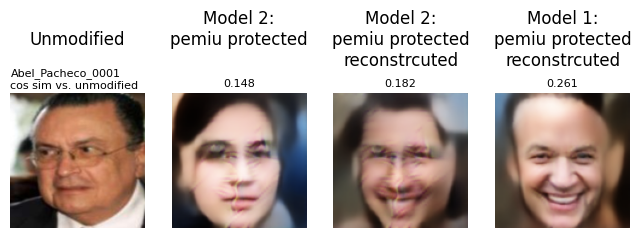

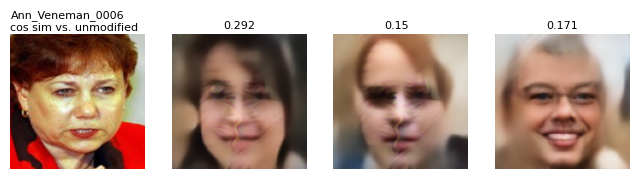

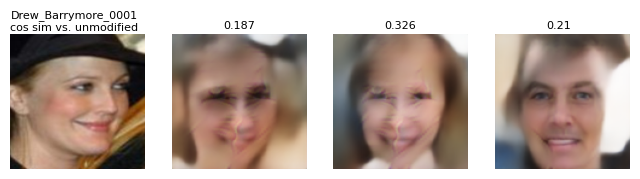

In [56]:
first_image = True
for i in [0, 10, 50]:
    data = df_joined[['filename',
                      'Cosine Distance_pemiu_normalized',
                      'Cosine Distance_pemiu_reconstructed_normalized']].values[i].tolist()
    data.append(df_genuine['cos_sim_a_a_pemiu_reconstructed_normalized'].values[i].tolist())
    display_image(data, first_image, "genuine", str(i).zfill(4))
    first_image = False

### Sorted by high cosine similarity for Model 2

- tbd

In [69]:
# Display the most similar images: real vs. pemiu reconstructed
df_joined = df_joined.join(df_genuine['cos_sim_a_a_pemiu_reconstructed_normalized'])

df_joined_sorted = df_joined.sort_values(by=['Cosine Distance_pemiu_reconstructed_normalized'], ascending=False)

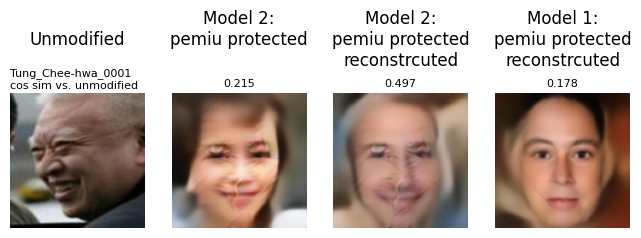

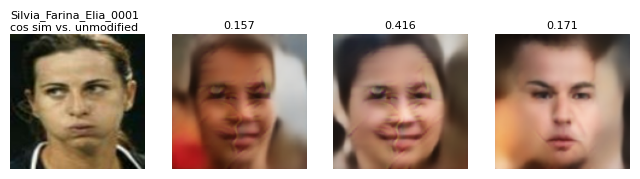

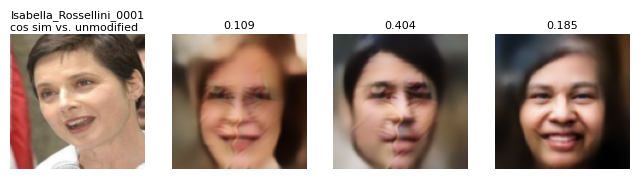

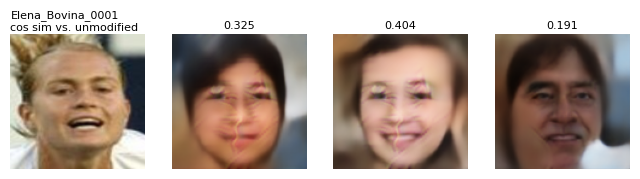

In [76]:
first_image = True
for i in range(0, 4):
    data = df_joined_sorted[['filename',
                  'Cosine Distance_pemiu_normalized',
                  'Cosine Distance_pemiu_reconstructed_normalized',
                  'cos_sim_a_a_pemiu_reconstructed_normalized']].values[i].tolist()
    display_image(data, 
                  first_image, 
                  "genuine", 
                  str(df_joined_sorted.index.values[i]).zfill(4))
    first_image = False